<a href="https://colab.research.google.com/github/redjules/logistic-regression/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-classification problem


-question influences analytical techique


-how do we measure accuracy?


-case study: which emails are spam?


-challenge: the se of penguins

# Case study:


-dataset with 5k emails


-what makes an email spammy?


-can we predict which emails are spam?


# Directoy, Libraries and Data

In [105]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [106]:
#Libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [107]:
# Load the data
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


# Data Analysis

In [108]:
# summary statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>],
       [<Axes: title={'center': 'n000'}>,
        <Axes: title={'center': 'make'}>]], dtype=object)

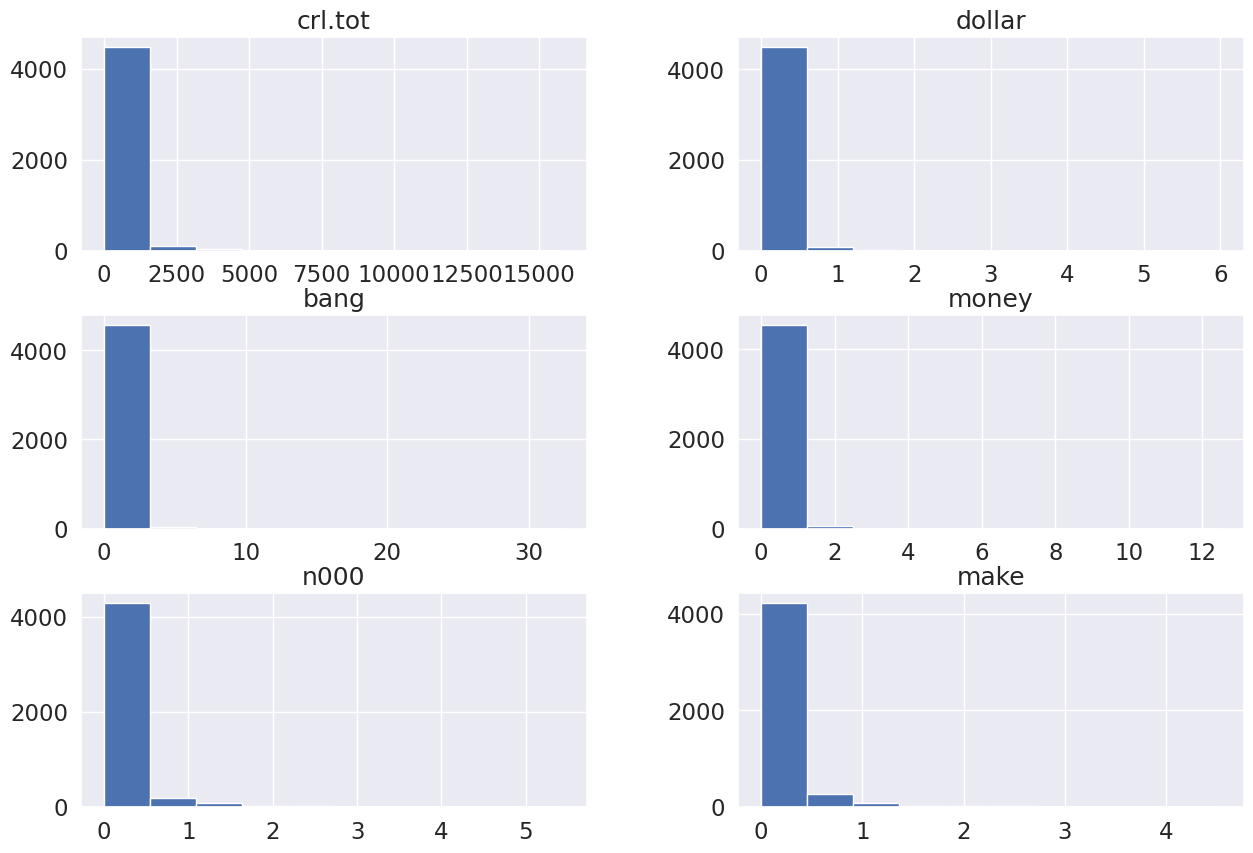

In [109]:
#histograms
df.hist(figsize=(15,10))

In [110]:
#removing outliers
print(len(df))
df = df[df["crl.tot"] < 1500]
df = df[df["bang"] < 5]
df = df[df["money"] < 6]
print(len(df))


4601
4432


<ipython-input-111-326521024dda>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

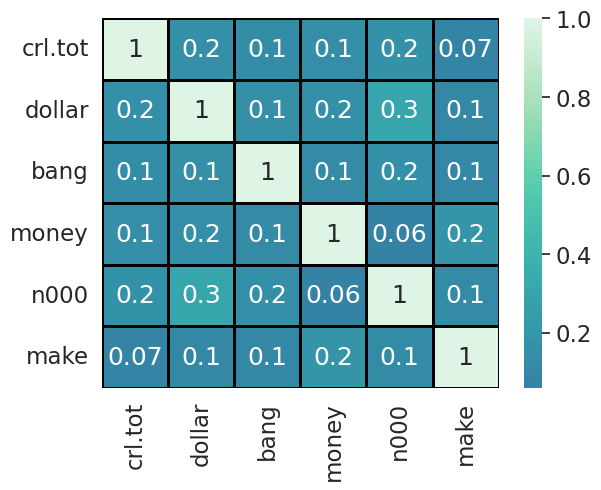

In [111]:
#Correlation matrix
sns.heatmap(df.corr(),
            annot = True,
            fmt='.1g',
            center=0,
            cmap='mako',
            linewidths =1,
            linecolor='black')

#Logistic Regression preparation

In [112]:
# Prepare dependent variable
df["yesno"] = np.where(df["yesno"] == "y",1,0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [113]:
#prepare the X and y
y = df.yesno
X = df.iloc[:,:-1]
X = sm.add_constant(X)
X.head(2)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [114]:
# Training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = 1502)


Logistic Regression

In [115]:
# Logistic Regression
model = sm.Logit(y_train,X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.4210
Time:                        10:16:53   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

# last coef (make) is not statistically significant

In [116]:
#Create the function
def logistic_reader(coefficient):
  probability = round((np.exp(coefficient)-1)*100, 2)
  print(probability)
  if probability > 0:
    print("The likelihood increases by", probability,"%")
  elif probability == 0:
    print("No impact")
  else:
    print("The likelihood increases by", probability,"%")




In [117]:
#Apply the function
logistic_reader(-0.5)

-39.35
The likelihood increases by -39.35 %


# Assess the model

In [118]:
#predicitons
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1,0)
predictions[:5]

array([1, 0, 0, 0, 0])

In [119]:
# Check if dataset is balanced
y_test.mean()

0.35400225479143177

In [120]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp,fn, tp = confusion_matrix(y_test, predictions).ravel()

[[524  49]
 [102 212]]


In [121]:
fn

102

In [122]:
#Accuracy 
accuracy = (tp + tn)/(tp+tn+fp+fn)
print("Accuracy:",round(accuracy*100,1),"%")

#F1_score
f1 = 2*tp/(2*tp + fn + fp)
print("F1_score:",round(f1*100,1),"%")

#Specificity
specificity = tn/ (tn + fp)
print("Specificity:", round(specificity*100,1),"%")

#Sensitivity
sensitivity = tp/ (tp + fn)
print("Sensitivity:", round(sensitivity*100,1),"%")


Accuracy: 83.0 %
F1_score: 73.7 %
Specificity: 91.4 %
Sensitivity: 67.5 %


In [123]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887



In [124]:
#load the data
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#Data Analysis

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

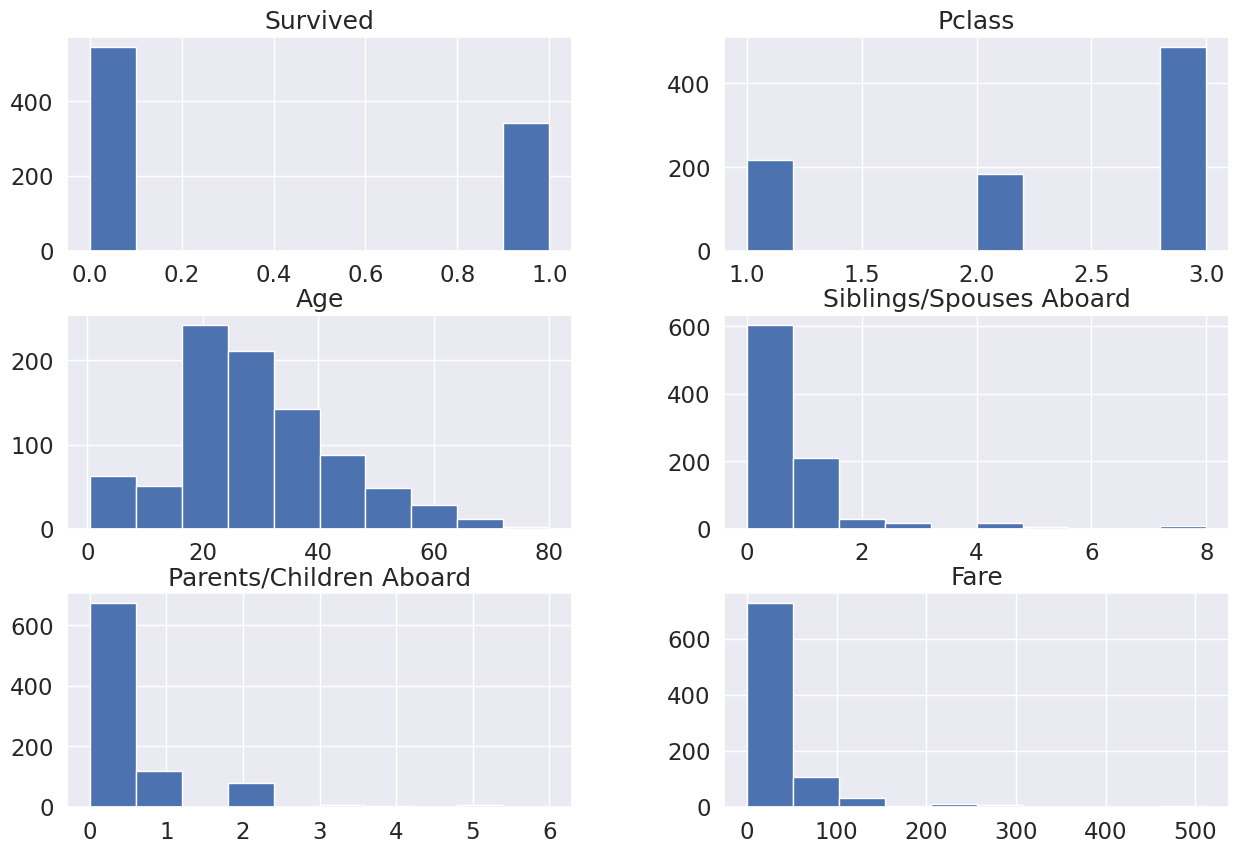

In [125]:
#histogram
df.hist(figsize=(15, 10))


In [126]:
#Drop name variable
df = df.drop(columns = "Name")
df.head(1)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.25


In [127]:
#Transform character variables
df = pd.get_dummies(data = df, drop_first=True)

<Axes: >

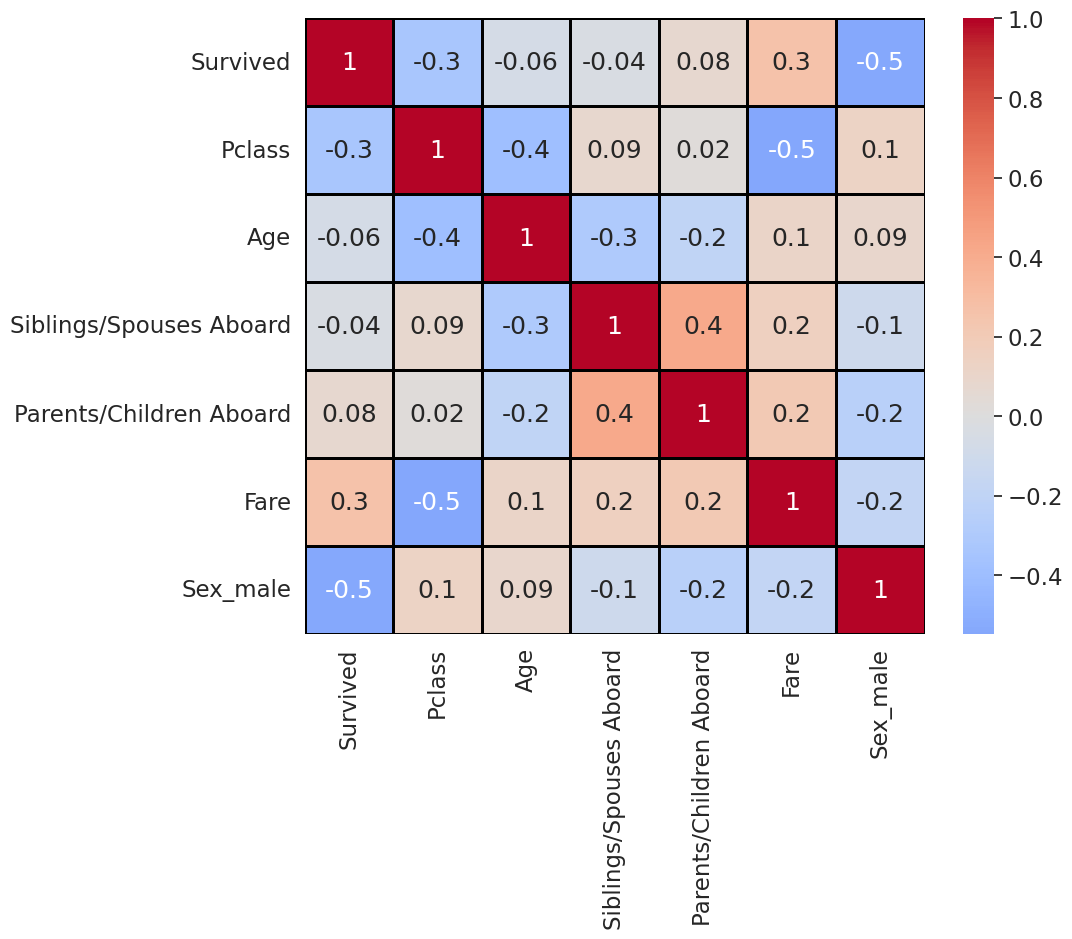

In [128]:
#Correlation matrix
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),
            annot=True,
            fmt='.1g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black')

# Logistic Regression preparation

In [129]:
df.head(0)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male


In [130]:
#Prepare X and Y
y = df.Survived
X = df.drop(columns="Survived")
X = sm.add_constant(X)

In [131]:
#Training and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1502)
                                                    

#Logistic Regression and Assessment


In [132]:
#Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Sun, 30 Apr 2023   Pseudo R-squ.:                  0.3915
Time:                        10:16:55   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898   

In [133]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Age                      887 non-null    float64
 3   Siblings/Spouses Aboard  887 non-null    int64  
 4   Parents/Children Aboard  887 non-null    int64  
 5   Fare                     887 non-null    float64
 6   Sex_male                 887 non-null    uint8  
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.6 KB


In [134]:
#predictions
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5,1,0)
predictions[:4]

array([1, 0, 0, 1])

In [135]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178

